## Iš pridėto requirements.txt failo sukurti anacondos aplinką ir žemiau esančias užduotis vykdyti šioje aplinkoje

# Pirma Dalis

In [ ]:
# 
# !pip install -r requirements.txt
%load_ext nb_black 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

# panaikina scientific skaičius atsakymuose
pd.options.display.float_format = '{:.4f}'.format

pd.set_option("display.max_columns", 50)


In [ ]:
raw_balanso_ataskaita_2020 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2020.csv"
)
raw_balanso_ataskaita_2021 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2021.csv"
)

In [ ]:
raw_pelno_ataskaita_2020 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2020.csv"
)
raw_pelno_ataskaita_2021 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2021.csv"
)

## 3.1 Ką reiškia skirtingi duomenų laukai? Iš kokių atributų sudaryti duomenys?

Kad geriau suprasti skirtingus duomenų tipus, jų laukus, galime vadovautis Registrų centro pateiktomis **"Duomenų rinkinio struktūros"** nuorodomis.

In [ ]:
raw_data_dictionary_balanso_ataskaita = pd.read_excel(
    "https://www.registrucentras.lt/bylos/dokumentai/duomenys/aduomenys/JAR_FA_RODIKLIAI_BLNS_STR.xlsx",
    header=1,
)
raw_data_dictionary_balanso_ataskaita

In [ ]:
raw_data_dictionary_pelno_nuostoliu_ataskaita = pd.read_excel(
    "https://www.registrucentras.lt/bylos/dokumentai/duomenys/aduomenys/JAR_FA_RODIKLIAI_PLNA_STR.xlsx",
    header=1,
)
raw_data_dictionary_pelno_nuostoliu_ataskaita.head(20)

## 3.2. Kiek reikšmių ir požymių turi kiekvienas iš dokumentų?


In [ ]:
pd.DataFrame(
    {
        "features": [
            len(raw_balanso_ataskaita_2020.columns),
            len(raw_balanso_ataskaita_2021.columns),
            len(raw_pelno_ataskaita_2020.columns),
            len(raw_pelno_ataskaita_2021.columns),
        ],
        "rows": [
            len(raw_balanso_ataskaita_2020),
            len(raw_balanso_ataskaita_2021),
            len(raw_pelno_ataskaita_2020),
            len(raw_pelno_ataskaita_2021),
        ],
        "dataset_name": [
            "raw_balanso_ataskaita_2020",
            "raw_balanso_ataskaita_2021",
            "raw_pelno_ataskaita_2020",
            "raw_pelno_ataskaita_2021",
        ],
    }
).set_index("dataset_name")

### 3.2. Ats:  
Kaip matome lentelėse, požymių skaičius atitinkančiuose dokumentuose sutampa: *Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – balanso ataskaitos* turi po 18, o *Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – pelno (nuostolių)* ataskaitos po 17  
Kiekvienas iš parsisiųstų dokumentų turi skirtingą skaičių reikšmių.


## 3.3 Kokio duomenų tipo yra kiekvienas iš požymių? Ar duomenų tipai tarp atitinkamų lentelių iš 2020 ir 2021 metų sutampa?

### 3.3. ats: 
Duomenų tipai sutampa tarp 2020 ir 2021 metų dokumentų, tačiau neatitinka duomenų rinkinio struktūroje nurodytų duomenų tipų.

In [ ]:
raw_balanso_ataskaita_2020.dtypes

In [ ]:
raw_balanso_ataskaita_2021.dtypes == raw_balanso_ataskaita_2020.dtypes

In [ ]:
raw_pelno_ataskaita_2020.dtypes

In [ ]:
raw_pelno_ataskaita_2021.dtypes == raw_pelno_ataskaita_2020.dtypes

## 3.4. Paaiškinkite kas yra object duomenų tipas ir kuo jis skiriasi nuo string duomenų tipo.

### 3.4. Ats:
Object duomenų tipas - tai bendrinis duomenų tipas, kuris apibūdinantis, kaip duomenys kompiuterio atmintyje yra užkoduoti. Obeject duomenų tipas yra bendrinis, kuris gali savyje laikyti duomenis, tačiau neturėti priskirtam duomenų tipui būdingų savybių. Pavyzdžiui, jei  turime požymio stulpelį "spalva", kurią sudaro "mėlyna" ir "žalia" rekšmės. jei požymio "spalva" duomenų tipas bus "Object" jam negalėsime pritaikyti String duomenų tipui būdingų funkcijų, kaip .str.lower(), str.upper() ir pan. Kitavertus, jei pakeisime požymio "spalva" duomenų tipą į String, šias funkcijas galėsime naudoti.

## 3.5. Kuri lentelė turi daugiausiai nežinomų verčių? Kuris požymis išsiskiria nežinomų verčių skaičiumi?

### Ats: Pelno nuostolių ataskaita 2021 turi daugiausiai nežinomų reikšmių. Pelno nuostolių ataskaitoje 2021 yra reikšmė turinti daugiausiai nežinomųjų : 'pelnas_pries_apmokestinima': 34755

In [ ]:
def count_na_values(dataframe: pd.DataFrame) -> int:
    return dataframe.isna().sum().sum()

In [ ]:
pd.DataFrame({
'total_na_count' : [count_na_values(raw_balanso_ataskaita_2020),
                    count_na_values(raw_balanso_ataskaita_2021),
                    count_na_values(raw_pelno_ataskaita_2020),
                    count_na_values(raw_pelno_ataskaita_2021)
                   ],
    'dataframe' : ['raw_balanso_ataskaita_2020','raw_balanso_ataskaita_2021','raw_pelno_ataskaita_2020','raw_pelno_ataskaita_2021']
}).set_index('dataframe').plot(kind='bar');


In [ ]:
def get_feature_with_most_na(dataframe: pd.DataFrame) -> dict:
    return dict(dataframe.isna().sum().nlargest(1))

In [ ]:
get_feature_with_most_na(raw_balanso_ataskaita_2020)

In [ ]:
get_feature_with_most_na(raw_balanso_ataskaita_2021)

In [ ]:
get_feature_with_most_na(raw_pelno_ataskaita_2020)

In [ ]:
get_feature_with_most_na(raw_pelno_ataskaita_2021)

## 3.6 Ar kažkuri lentelė turi pasikartojančių duomenų?
### Ats: iš pirmo žvilgsnio nei viena lentelė neturi pasikartojančių duomenų eilučių.

In [ ]:
raw_balanso_ataskaita_2020.duplicated().sum()

In [ ]:
raw_balanso_ataskaita_2021.duplicated().sum()

In [ ]:
raw_pelno_ataskaita_2020.duplicated().sum()

In [ ]:
raw_pelno_ataskaita_2021.duplicated().sum()

## 3.6.1. Kokia stulpelių aibė vienareikšmiškai identifikuoja kiekvienos lentelės eilutę?
### ATS. vienas požymių stulpelis unikaliai neidentifikuoja eilutės reikšmes. tai galime pastebėti skaičiuojant santikį unikalių " obj_kodas "  skaičiaus reikšmių padalintų iš viso duomenų masyvo eilučių skaičiaus. Detaliau pasižiūrėję į duomenis pastebime, jog vienas objekto kodas (obj_kodas) gali turėti kelis skirtingus laikotarpius (laikotarpis_nuo ir laikotarpis_iki). Norint gauti unikalią aibę, galime sujungti "obj_kodas" ir "laikotarpis_nuo" reikšmes.

In [ ]:
raw_balanso_ataskaita_2020.head(3)

In [ ]:
len(raw_balanso_ataskaita_2020.obj_kodas.unique()) / len(raw_balanso_ataskaita_2020)

In [ ]:
len(raw_balanso_ataskaita_2021.obj_kodas.unique()) / len(raw_balanso_ataskaita_2021)

In [ ]:
len(raw_pelno_ataskaita_2021.obj_kodas.unique()) / len(raw_pelno_ataskaita_2021)

In [ ]:
len(raw_pelno_ataskaita_2020.obj_kodas.unique()) / len(raw_pelno_ataskaita_2020)

In [ ]:
raw_balanso_ataskaita_2020.obj_kodas.value_counts()

In [ ]:
raw_balanso_ataskaita_2020[raw_balanso_ataskaita_2020["obj_kodas"] == 168970870]

In [ ]:
test_2 = raw_balanso_ataskaita_2020[
    raw_balanso_ataskaita_2020["obj_kodas"] == 145496790
]
len(test_2) == len(test_2.laikotarpis_nuo.unique())
test_2

In [ ]:
test_3 = raw_balanso_ataskaita_2020[
    raw_balanso_ataskaita_2020["obj_kodas"] == 159884874
]
len(test_3) == len(test_3.laikotarpis_nuo.unique())

#### Unikalių aibių sukurimas ir patikrinimas

In [ ]:
uniq_balanso_ataskaita_2020 = raw_balanso_ataskaita_2020.copy()
uniq_balanso_ataskaita_2020["uniq_id"] = (
    raw_balanso_ataskaita_2020["laikotarpis_nuo"].astype(str)
    + "_"
    + raw_balanso_ataskaita_2020["obj_kodas"].astype(str)
)

len(uniq_balanso_ataskaita_2020.uniq_id) == len(raw_balanso_ataskaita_2020)

In [ ]:
uniq_balanso_ataskaita_2021 = raw_balanso_ataskaita_2021.copy()
uniq_balanso_ataskaita_2021["uniq_id"] = (
    raw_balanso_ataskaita_2021["laikotarpis_nuo"].astype(str)
    + "_"
    + raw_balanso_ataskaita_2021["obj_kodas"].astype(str)
)

len(uniq_balanso_ataskaita_2021.uniq_id) == len(raw_balanso_ataskaita_2021)

In [ ]:
uniq_pelno_ataskaita_2020 = raw_pelno_ataskaita_2020.copy()
uniq_pelno_ataskaita_2020["uniq_id"] = (
    uniq_pelno_ataskaita_2020["laikotarpis_nuo"].astype(str)
    + "_"
    + uniq_pelno_ataskaita_2020["obj_kodas"].astype(str)
)

len(uniq_pelno_ataskaita_2020.uniq_id) == len(raw_pelno_ataskaita_2020)

In [ ]:
uniq_pelno_ataskaita_2021 = raw_pelno_ataskaita_2021.copy()
uniq_pelno_ataskaita_2021["uniq_id"] = (
    uniq_pelno_ataskaita_2021["laikotarpis_nuo"].astype(str)
    + "_"
    + uniq_pelno_ataskaita_2021["obj_kodas"].astype(str)
)

len(uniq_pelno_ataskaita_2021.uniq_id) == len(raw_pelno_ataskaita_2021)

## Kad būtų patogiau dirbti, sujungsiu 2021 ir 2022 metų duomenų masyvus. kad būtų patogiau identifikuoti, sukursiu papildomą požimį, nurodantį duomenų masyvo identifikavimą.

In [ ]:
uniq_balanso_ataskaita_2020["df_year"], uniq_balanso_ataskaita_2021["df_year"] = (
    2020,
    2021,
)

In [ ]:
balanso_ataskaita = (
    pd.concat([uniq_balanso_ataskaita_2020, uniq_balanso_ataskaita_2021])
    .reset_index()
    .drop("index", axis=1)
)

In [ ]:
len(balanso_ataskaita) == len(uniq_balanso_ataskaita_2020) + len(
    uniq_balanso_ataskaita_2021
)

In [ ]:
uniq_pelno_ataskaita_2020["df_year"], uniq_pelno_ataskaita_2021["df_year"] = 2020, 2021

In [ ]:
pelno_ataskaita = pd.concat([uniq_pelno_ataskaita_2020,uniq_pelno_ataskaita_2021]).reset_index().drop('index',axis=1)


In [ ]:
len(pelno_ataskaita) == len(uniq_pelno_ataskaita_2020) + len(uniq_pelno_ataskaita_2021)

# Antra Dalis

## 4. Keletas juridinių asmenų pavadinimų yra tiesiogiai susiję su “Thermo Fisher” bendrove. Raskite pilnus šių bendrovių pavadinimus.

In [ ]:
# kad būtų galima naudoti string native funkcijas, pakeičiu duomenų tipą į "String"
balanso_ataskaita["obj_pav"] = balanso_ataskaita["obj_pav"].astype(str)

In [ ]:
mask = balanso_ataskaita["obj_pav"].str.contains("Thermo Fisher")
balanso_ataskaita[mask]["obj_pav"].to_list()

### 5. Apsimeskime, kad atributas “form_pav” neegzistuoja. Iš likusių laukelių gaukite visas UAB ir MB bendroves. Palyginkite rekonstrukcijos tikslumą su “form_pav” vertėmis - kiek procentų verčių pavyko atkurti skirtingose duomenyse?

In [ ]:
def get_mb_uab_s(series: pd.Series):
    split_obj_name = series.lower().split(" ")
    if "mb" in split_obj_name:
        return "Mažoji bendrija"
    elif ("mažoji" and "bendrija") in split_obj_name:
        return "Mažoji bendrija"
    elif "uab" in split_obj_name:
        return "Uždaroji akcinė bendrovė"
    elif "uždaroji" in split_obj_name and "bendrovė" in split_obj_name:
        return "Uždaroji akcinė bendrovė"
    return "not_in_scope"

In [ ]:
balanso_ataskaita["inf_type"] = balanso_ataskaita["obj_pav"].apply(
    lambda x: get_mb_uab_s(x)
)

In [ ]:
balanso_ataskaita["inf_type"].value_counts()

In [ ]:
result = (
    len(balanso_ataskaita[balanso_ataskaita["inf_type"] == "Mažoji bendrija"])
    / len(balanso_ataskaita[balanso_ataskaita["form_pav"] == "Mažoji bendrija"])
    * 100
)

print(f" Pavyko atkurti {round(result,2)}% Mažoji bendrija verčių")

In [ ]:
result = (
    len(balanso_ataskaita[balanso_ataskaita["inf_type"] == "Uždaroji akcinė bendrovė"])
    / len(
        balanso_ataskaita[balanso_ataskaita["form_pav"] == "Uždaroji akcinė bendrovė"]
    )
    * 100
)

print(f" Pavyko atkurti {round(result,2)}% Uždaroji akcinė bendrovė verčių")

Nepavyko gauti 100 procentų dėl pritaikytos logikos, ieškant 'mb' reikšmes, gaunamas skaičius yra didesnis, todėl, kad įtraukiami list'o elementai turintys 'mb' viduje, kaip pavyzdys galėtų būti žodis staMBbus.

tačiau kadangi paklaida yra maža, pasilieku galimybę pataisyti šį sprendimą, jei liks laiko ateityje

## 6. Apskaičiuoti vidutines reikšmes “pelnas_pries_apmokestinima” ir “nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė bendrovė, Mažoji bendrija, etc.) už visą laikotarpį (2020 ir 2021 metai kartu).

In [ ]:
pelno_ataskaita.groupby("form_pav").mean()["pelnas_pries_apmokestinima"].sort_values(
    ascending=False
)

In [ ]:
balanso_ataskaita.groupby("form_pav").mean()["nuosavas_kapitalas"].sort_values(
    ascending=False
)

## 7. Atrinkti unikalias UAB ir MB įmones, kurių “nuosavas_kapitalas” buvo didesnis negu visų UAB ir MB įmonių nuosavo kapitalo mediana už visą laitotarpį (2020 ir 2021 metai kartu)

In [ ]:
# susikuriamas naujas dataset'as su subset'u, kuri sudaro tik UAB IR MB
sample_df = balanso_ataskaita[
    (balanso_ataskaita["form_pav"] == "Uždaroji akcinė bendrovė")
    | (balanso_ataskaita["form_pav"] == "Mažoji bendrija")
]
# surandama UAB ir MB mediana
nuosavo_kapitalo_mediana = sample_df["nuosavas_kapitalas"].median()

In [ ]:
nuosavo_kapitalo_mediana

In [ ]:
mask = sample_df["nuosavas_kapitalas"] > nuosavo_kapitalo_mediana

unique_company_list = sample_df[mask]["obj_pav"].unique().tolist()

len(unique_company_list)

In [ ]:
# atkomentavę ir paleidę žemiau esančią kodo eilutę, gausite sąrašą visų įmonių

# unique_company_list

## 8. Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į 99th percentilę). Patikrinkite įmonių patenkančių į TOP-10 vertes rekvizitai.vz.lt svetainėje. Ranka įrašomi duomenys sukuria klaidos galimybę. Ar yra bendrovė, kurios “nuosavas_kapitalas” jums kelia įtarimų?

In [ ]:
# skaičiuojant percentilę, panaikinsiu nežinomas reikšmes.

temp_arr = balanso_ataskaita["nuosavas_kapitalas"].dropna()

In [ ]:
perc_99 = np.percentile(temp_arr, 99)
perc_99

In [ ]:
mask = (
    balanso_ataskaita.groupby(["obj_pav", "df_year"]).mean()["nuosavas_kapitalas"]
    > perc_99
)

balanso_ataskaita.groupby(["obj_pav", "df_year"]).mean()["nuosavas_kapitalas"][
    mask
].sort_values(ascending=False).head(10)

1. Thermo Fisher Scientific Vector Holdings 2020 metais -> sutampa
2. UAB "Thermo Fisher Scientific Vector Senior Holdings I" 2020 metais -> sutampa
3. UAB "Thermo Fisher Scientific Vector Senior Holdings II"  2020 metais -> sutampa
4. Valstybės įmonė Lietuvos automobilių kelių direkcija 2020 metais -> sutampa
5. Uždaroji akcinė bendrovė "Vilniaus prekyba" 2020 metai -> sutampa
6. AB "Ignitis grupė" 2020 metai -> sutampa
7. Uždaroji akcinė bendrovė "Vilniaus prekyba" 2019 metai -> sutampa
8. MAXIMA GRUPĖ UAB 2020 metai -> sutampa
9. MAXIMA GRUPĖ UAB 2019 metai -> sutampa
10. UAB "Thermo Fisher Scientific Vector Senior Holdings I" 2019 metai -> sutampa  
  
Visos top 10 įmonių nuosavas kapitalas sutampa su nuosavu kapitalu, nurodytu rekvizitai.lt. būtų itin keista, jei būtų kitaip. :)


## 9. Vizualiai atvaizduoti juridinių asmenų formos pasiskirstymą per visą laikotarpį (2020 ir 2021 metais kartu). Vizualizacijos turi sutapti su pavaizduota dešinėje

In [ ]:
kiekis = (
    balanso_ataskaita.groupby(["form_pav", "df_year"])
    .count()["obj_kodas"]
    .reset_index()
)
kiekis

In [ ]:
fig = plt.figure(figsize=(10, 5))

sns.barplot(data=kiekis, x="form_pav", y="obj_kodas", hue="df_year")

## 10. Kurį mėnesį buvo įregistruota daugiausiai juridinių asmenų 2020 ir 2021 metais? Atvaizduokite stulpelinę diagramą.

In [ ]:
# pakeičiu duomenų tipą į datetime
balanso_ataskaita["reg_date"] = pd.to_datetime(balanso_ataskaita["reg_date"])

In [ ]:
# susikuriu nauja stulpeli, pagal kuri butu galima agreguoti duomenis
balanso_ataskaita["reg_year_month"] = balanso_ataskaita["reg_date"].dt.strftime("%Y-%m")

In [ ]:

grpd_data =  balanso_ataskaita.groupby(['reg_year_month']).count()['form_pav'].reset_index()


In [ ]:
grpd_data

In [ ]:
plot = sns.barplot(grpd_data, x='reg_year_month', y='form_pav')
plt.title('Įmonių skaičius pamėnesiui įregistruotų 2020 ir 2021 metais')
plot.set(xlabel=None, ylabel='Skaičius')
plt.xticks(rotation = 45);


## 11. Vizualiai atvaizduoti juridinių asmenų statuso pasiskirstymą kiekvienais metais

In [ ]:
balanso_ataskaita.groupby(["stat_statusas", "df_year"]).count()["stat_pav"]

In [ ]:
hist_df = (
    balanso_ataskaita.groupby(["stat_statusas", "df_year"])
    .count()["stat_pav"]
    .reset_index(name="count")
)
hist_df

In [ ]:
hist = sns.histplot(data=hist_df, x="stat_statusas", hue='df_year', element='step');
hist.set(title='Juridinių asmenų pasiskirstymas 2020 ir 2021 metais');



Iš histogramos matome, jog abejais metais pasiskirstymas yra itin panašus.

## 12.  Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” + “nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis stulpelinėje diagramoje

In [ ]:
merged_df = balanso_ataskaita.merge(pelno_ataskaita, on="uniq_id", how="left")

In [ ]:
# grupuojant gaunamas nuosavo kapitalo vidurkis kiekvienai unikaliai įmonei kiekvienais metais (taip panaikinami įmonių pavadinimų pasikartojimai, turintys skirtinas nuosavo_kapitalo reikšmes)

balanso_ataskaita_nuosavas_kapitalas_vid = (
    balanso_ataskaita.groupby(["obj_pav", "df_year"])
    .mean()["nuosavas_kapitalas"]
    .reset_index(name="nuosavo_kapitalo_vidurkis")
)
balanso_ataskaita_nuosavas_kapitalas_vid

In [ ]:
pelno_ataskaita_grynasis_pelnas_vid = (
    pelno_ataskaita.groupby(["obj_pav", "df_year"])
    .mean()["grynasis_pelnas"]
    .reset_index(name="grynojo_pelno_vidurkis")
)
pelno_ataskaita_grynasis_pelnas_vid

In [ ]:
# inner join palieka tik tas įmones, kurios yra minimos abiejuose duomenų masyvuose.
sujungtos_ataskaitos = balanso_ataskaita_nuosavas_kapitalas_vid.merge(
    pelno_ataskaita_grynasis_pelnas_vid, on=["obj_pav", "df_year"], how="inner"
)

sujungtos_ataskaitos.shape

In [ ]:
sujungtos_ataskaitos["kapitalo_pelno_suma"] = (
    sujungtos_ataskaitos["nuosavo_kapitalo_vidurkis"]
    + sujungtos_ataskaitos["grynojo_pelno_vidurkis"]
)

In [ ]:
def get_tendency(dataframe):
    imoniu_pav = dataframe.obj_pav.unique().tolist()
    dict_ = {}
    for name in imoniu_pav:
        # print(name)
        try:
            temp_df = dataframe[dataframe['obj_pav'] == name ].reset_index()
            if (temp_df['kapitalo_pelno_suma'][1] - temp_df['kapitalo_pelno_suma'][0] ) > 0:
                result = ('Teigiama tendencija')
            if  (temp_df['kapitalo_pelno_suma'][1] - temp_df['kapitalo_pelno_suma'][0] ) < 0: 
                result = ('Neigiama tendencija')
            if (temp_df['kapitalo_pelno_suma'][1] - temp_df['kapitalo_pelno_suma'][0] ) == 0:
                result =('Pokyčio nebuvo')
               
        except:
            result = ('Truksta duomenu')
        dict_.update({name:result})
    return dict_
      
    


In [ ]:
# tai tikrai nėra pats optimaliausias sprendimas (užtruka ~15 minučių kol sukuriamas rinkinys), tačiau veikia kuo puikiausiai :)

# del sios priezasties, uzkomentuoju apacioje esanti koda, tačiau išsaugau gautą duomenų rinkinį su priskirtu nauju požymiu.

# dict_for_mapping = get_tendency(sujungtos_ataskaitos)
# sujungtos_ataskaitos["tendencija"] = sujungtos_ataskaitos["obj_pav"].map(dict_for_mapping)
# # sujungtos_ataskaitos.to_csv('bendras_duomenu_rinkinys_su_tendencija.csv')

In [ ]:
# sukurtame rinkinyje yra 106702 unikalios reikšmės, kurių skaičius sutampa su unikaliais įmonių pavadinimais pagrindiniame duomenų rinkinyje.

# len(dict_for_mapping) == sujungtos_ataskaitos['obj_pav'].unique().size

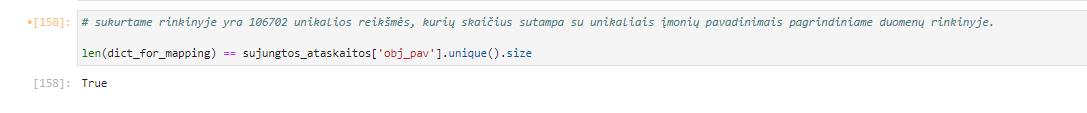

In [ ]:
sujungtos_ataskaitos = pd.read_csv(
    "bendras_duomenu_rinkinys_su_tendencija.csv", index_col=False
).drop("Unnamed: 0", axis=1)

In [ ]:
sujungtos_ataskaitos[sujungtos_ataskaitos["df_year"] == 2021].groupby(
    "tendencija"
).count()["obj_pav"].plot(kind="bar")
plt.title("Grynojo Pelno ir Nuosavo Kapitalo pokytis `20 ir `21 metais \n")
plt.xlabel("")
plt.ylabel("Skaičius")
plt.xticks(rotation=45)

## 13. Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo. Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”, “Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Toliau veiklą vykdanti įmonė pažymėta "Teisinis stat neįregistruotas" statusu. Kokia bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis.

### Ats 1. Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo.
    'UAB "Kesko Senukai Digital"',
    'Uždaroji akcinė bendrovė "Agrovet"',
    'Uždaroji akcinė bendrovė "Saulenė"',
     'Uždaroji akcinė bendrovė "Pušis"'

In [ ]:
# susikursiu du subset'us, kuriuose bus tik UAB ir MB imones, kad dirbti butu paprasciau
mask_balanso = (balanso_ataskaita["form_pav"] == "Mažoji bendrija") | (
    balanso_ataskaita["form_pav"] == "Uždaroji akcinė bendrovė"
)

balanso_mb_uab_subset = balanso_ataskaita[mask_balanso].copy()
balanso_mb_uab_subset.shape

In [ ]:
mask_pelno = (pelno_ataskaita["form_pav"] == "Mažoji bendrija") | (
    pelno_ataskaita["form_pav"] == "Uždaroji akcinė bendrovė"
)

pelno_mb_uab_subset = pelno_ataskaita[mask_pelno].copy()
pelno_mb_uab_subset.shape

In [ ]:
balanso_mb_uab_subset.stat_pav.value_counts()

In [ ]:
pelno_mb_uab_subset.stat_pav.value_counts()

In [ ]:
# susikursiu binariny "bankrutavęs" stulpelį kiekviename iš duomenų masyvų. tai padės filtruoti ir lyginti reikšmes skirtingais metais

In [ ]:
def is_bankrupt(dataframe):
    bankroto_pav = [
        "Bankrutavęs",
        "Bankrutuojantis",
        "Išregistruotas",
        "Inicijuojamas likvidavimas",
        "Likviduojamas",
        "Likviduojamas dėl bankroto",
    ]

    if dataframe["stat_pav"] in bankroto_pav:
        return 1
    return 0


balanso_mb_uab_subset["yra_bankrutaves"] = balanso_mb_uab_subset.apply(
    is_bankrupt, axis=1
)

In [ ]:
balanso_mb_uab_subset[balanso_mb_uab_subset["yra_bankrutaves"] == 1][
    "stat_pav"
].value_counts()

In [ ]:
balanso_mb_uab_subset[balanso_mb_uab_subset["yra_bankrutaves"] != 1][
    "stat_pav"
].value_counts()

In [ ]:
pelno_mb_uab_subset["yra_bankrutaves"] = pelno_mb_uab_subset.apply(is_bankrupt, axis=1)

In [ ]:
pelno_mb_uab_subset[pelno_mb_uab_subset["yra_bankrutaves"] == 1][
    "stat_pav"
].value_counts().sum()

In [ ]:
pelno_mb_uab_subset[pelno_mb_uab_subset["yra_bankrutaves"] != 1][
    "stat_pav"
].value_counts()

In [ ]:
def bankrutavo_2021(dataframe):
    if (dataframe['df_year'] == 2021 and dataframe['yra_bankrutaves'] == 1):
        return 1
    return 0
def vykde_veikla_2020(dataframe):
    if (dataframe['df_year'] == 2020 and dataframe['yra_bankrutaves'] == 0):
        return 1
    return 0


In [ ]:
balanso_mb_uab_subset["bankrutavo_2021"] = balanso_mb_uab_subset.apply(
    bankrutavo_2021, axis=1
)
balanso_mb_uab_subset["vykde_veikla_2020"] = balanso_mb_uab_subset.apply(
    vykde_veikla_2020, axis=1
)

pelno_mb_uab_subset["bankrutavo_2021"] = pelno_mb_uab_subset.apply(
    bankrutavo_2021, axis=1
)
pelno_mb_uab_subset["vykde_veikla_2020"] = pelno_mb_uab_subset.apply(
    vykde_veikla_2020, axis=1
)

In [ ]:
balanso_mb_uab_subset[
    (balanso_mb_uab_subset["bankrutavo_2021"] == 0)
    & (balanso_mb_uab_subset["vykde_veikla_2020"] == 1)
]["stat_pav"].value_counts()

In [ ]:
balanso_mb_uab_subset[(balanso_mb_uab_subset["bankrutavo_2021"] == 1)][
    "stat_pav"
].value_counts()

In [ ]:
vykde_veikla_2020_list = (
    balanso_mb_uab_subset[balanso_mb_uab_subset["vykde_veikla_2020"] == 1]["obj_pav"]
    .unique()
    .tolist()
)
bankrutavo_2021_list = (
    balanso_mb_uab_subset[balanso_mb_uab_subset["bankrutavo_2021"] == 1]["obj_pav"]
    .unique()
    .tolist()
)

In [ ]:
atsakymas = [i for i in vykde_veikla_2020_list if i in bankrutavo_2021_list]

In [ ]:
atsakymas

### 13.2 Kokia bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis
### ats: 13.2
* bankrutavusių įmonių “nuosavas_kapitalas” suma 2021 metais = 452059119.80654764
* bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais = -139702616.41369045 
* veikiančių įmonių “nuosavas_kapitalas” suma 2021 metais = 54547149970.47768
* veikiančių įmonių “grynasis_pelnas” suma 2021 metais = 5278014541.534724

lyginant sumas, matome, kad grynasis pelnas turi itin didelę įtaką. :)

In [ ]:
# išsirenku tik bankrutavusias įmones 2021 metais, kadangi įrašai pasikartoja, o ties kiekvienu įrašu nuosavas įmonės kapiatalas skiriasi - imu vidurkį. kurį susumuoju.

balanso_mb_uab_subset[balanso_mb_uab_subset["bankrutavo_2021"] == 1].groupby(
    "obj_pav"
).mean()["nuosavas_kapitalas"].sum()

In [ ]:
# taip pat, tik su pelnu
pelno_mb_uab_subset[(pelno_mb_uab_subset["bankrutavo_2021"] == 1)].groupby(
    "obj_pav"
).mean()["grynasis_pelnas"].sum()

In [ ]:
balanso_mb_uab_subset[
    (balanso_mb_uab_subset["bankrutavo_2021"] == 0)
    & (balanso_mb_uab_subset["df_year"] == 2021)
    & (balanso_mb_uab_subset["stat_pav"] == "Teisinis stat neįregistruotas")
].groupby("obj_pav").mean()["nuosavas_kapitalas"].sum()

In [ ]:
pelno_mb_uab_subset[
    (pelno_mb_uab_subset["bankrutavo_2021"] == 0)
    & (pelno_mb_uab_subset["df_year"] == 2021)
    & (pelno_mb_uab_subset["stat_pav"] == "Teisinis stat neįregistruotas")
].groupby("obj_pav").mean()["grynasis_pelnas"].sum()

### 14. Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir “ilgalaikis_turtas”.
    a. Suskirstyti įmones į 5 grupes pagal lauką “turtas”.
    b. Palyginti kaip šios grupės keičiasi 2020 ir 2021 metais. Palyginimą atvaizduoti skrituline diagrama ir gauti tokį patį kaip apačioje pavaizduotas paveikslas (skaitinės reikšmės gali skirtis):
        i. naudojantis matplotlib funkcionalumu.
        ii. naudojantis pandas funkcionalumu.


In [ ]:
balanso_ataskaita["turtas"] = (
    balanso_ataskaita["ilgalaikis_turtas"] + balanso_ataskaita["trumpalaikis_turtas"]
)

In [ ]:
# kadangi turime pasikartojančias įmones, surasiu unikalias įmonių turto vidurkio reikšmes `20 ir `21 metais

plot_turtas = (
    balanso_ataskaita.groupby(["obj_pav", "df_year"])
    .mean()["turtas"]
    .unstack()
    .reset_index()
)
plot_turtas

In [ ]:
bins = [1,3_000, 20_000, 35_000, 70_000, 100_000]
category = ['iki 3k', '3k - 20k', '20k-35k', '35k-70k', '70k+']
plot_turtas['20_cut'] = pd.cut(plot_turtas[2020], bins, labels=category)
plot_turtas['21_cut'] = pd.cut(plot_turtas[2021], bins, labels=category)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# is stack overflow:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return "{p:.2f}%  ({v:d})".format(p=pct, v=val)

    return my_autopct


plt_20 = (
    plot_turtas.groupby("20_cut")
    .sum()[2020]
    .sort_values()
    .plot(kind="pie", autopct=make_autopct([2020]), title="2020", ax=ax1)
)

plt_21 = (
    plot_turtas.groupby("21_cut")
    .sum()[2021]
    .sort_values()
    .plot(kind="pie", autopct=make_autopct([2021]), title="2021", ax=ax2)
)


plt.ylabel("")

## 15. Rasti TOP-100 pelningiausių įmonių pagal “grynasis pelnas” ir TOP-100 įmonių kurių “nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose?

In [ ]:
top_100_nuosavas_kapitalas = (
    balanso_ataskaita.groupby("obj_pav")
    .mean()["nuosavas_kapitalas"]
    .nlargest(100)
    .sort_values(ascending=False)
    .reset_index()["obj_pav"]
    .tolist()
)
top_100_grynasis_pelnas = (
    pelno_ataskaita.groupby("obj_pav")
    .mean()["grynasis_pelnas"]
    .nlargest(100)
    .sort_values(ascending=False)
    .reset_index()["obj_pav"]
    .tolist()
)

In [ ]:
set(top_100_nuosavas_kapitalas).intersection(set(top_100_grynasis_pelnas))

In [ ]:
top_companies = [i for i in top_100_nuosavas_kapitalas if i in top_100_grynasis_pelnas]
len(top_companies)

In [ ]:
# sutampančios įmonės
top_companies

## 16. Ar TOP įmonės pagal “grynasis pelnas” iš 15 užduoties skiriasi pagal metus, t.y. 2020 ir 2021 metais? Kurios įmonės iškrenta iš TOP sąrašo 2021 metais? 
### 16.1. Ar TOP įmonės pagal “grynasis pelnas” iš 15 užduoties skiriasi pagal metus, t.y. 2020 ir 2021 metais? 
#### TOP 100 įmonės 2020 metais, kurios nėra Tarp TOP 100 pelningiausių 2021/2022 kartu:
     'UAB "Avion Express"',
     'UAB "GetJet Airlines"',
     'AB "BALTIC SHOPPING CENTERS"',
     'UAB "Green Genius"',
     'UAB "Sorensen Invest"',
     'UAB LIVE SQUARE LT',
     'AB "Amber Grid"',
     'Uždarojo tipo informuotiesiems investuotojams skirta investicinė bendrovė UAB "LIM Verslo Trikampio NT Fondas"',
     'UAB "Inter Krasta"',
     'UAB "Klaško"',
     'UAB "HEKON"',
     '4Wind UAB',
     'UAB "Vilniaus aidai"',
     'UAB "SPECTATOR"',
     'Baltic Champs Group UAB',
     'Atvirojo tipo Informuotiesiems investuotojams skirta investicinė kintamojo kapitalo bendrovė "Mūsų ateities investicijos"',
     'MD PARTNERS UAB',
     'UAB "EBV Finance"',
     'MG investment UAB',
     'UAB "K29"',
     'Uždaroji akcinė bendrovė "NESTE LIETUVA"',
     'UAB "Biosantara"
#### TOP 100 įmonės 2021 metais, kurios nėra Tarp TOP 100 pelningiausių 2020/2021 kartu:
      'UAB "Skyroad Leasing"',
     'AviaAM Leasing Service Centre AB',
     'UAB "Magnus Investments"',
     'UAB AR Finance',
     'Uždaroji akcinė bendrovė "VILBRA"',
     'IKI Lietuva UAB',
     'Akcinė bendrovė "Invalda privatus kapitalas"',
     'UAB "BFIII G1"',
     'UAB "Agrokoncerno grūdai"',
     'UAB "BIOTECHA"',
     'UAB "Egilora"',
     'Uždaroji akcinė bendrovė "IMMOBILITAS"',
     'Uždaroji akcinė bendrovė "TRANSIMEKSA"',
     'Uždaroji akcinė bendrovė "Ryterna"',
     'UAB "Nordcurrent Group"',
     'Informuotiesiems investuotojams skirta uždarojo tipo investicinė UAB "Baltic Retail Properties"',
     'AB "Modus Energy"',
     'Littelfuse LT UAB',
     'UAB "Sonex consulting"',
     'UAB "Ingka Investments Lithuania"',
     'Uždaroji akcinė bendrovė "RIMI LIETUVA"

In [ ]:
pelningiausios_2020 = (
    pelno_ataskaita[pelno_ataskaita["df_year"] == 2020]
    .groupby("obj_pav")
    .sum()["grynasis_pelnas"]
    .nlargest(100)
    .sort_values(ascending=False)
    .reset_index()["obj_pav"]
    .tolist()
)
pelningiausios_2021 = (
    pelno_ataskaita[pelno_ataskaita["df_year"] == 2021]
    .groupby("obj_pav")
    .sum()["grynasis_pelnas"]
    .nlargest(100)
    .sort_values(ascending=False)
    .reset_index()["obj_pav"]
    .tolist()
)

In [ ]:
# pelningiausios_2020

In [ ]:
# pelningiausios_2021

In [ ]:
[i for i in pelningiausios_2020 if i not in top_100_grynasis_pelnas]

In [ ]:
[i for i in pelningiausios_2021 if i not in top_100_grynasis_pelnas]

### 16.2. Kurios įmonės iškrenta iš TOP sąrašo 2021 metais ?

In [ ]:
[i for i in pelningiausios_2020 if i not in pelningiausios_2021]

# Trečia Dalis

<font color='red'> Justas Kalpokas: 
1. <font color='red'> viskas puikiai sekėsi, bet turbūt dėl laiko stokos nepavyko padaryti įmonių palyginimo ir labiausiai augusių atrinkimo. <font color='red'> 


</font>

In [ ]:
# sodra_2019 = pd.read_csv('monthly-2019-sodra.csv', sep=';')
# sodra_2020 = pd.read_csv('monthly-2020-sodra.csv', sep=';')


In [ ]:
sodra_2019 = pd.read_csv("../data/monthly-2019.csv", sep=";")
sodra_2020 = pd.read_csv("../data/monthly-2020.csv", sep=";")

In [ ]:
sodra_2019.shape

In [ ]:
sodra_2019.info()

In [ ]:
sodra_2020.shape

In [ ]:
sodra_2020.info()

In [ ]:
# pasilieku tik reikalingus columns'us.
# nesirenku
required_cols = [
    "Juridinių asmenų registro kodas (jarCode)",
    "Pavadinimas (name)",
    "Vidutinis darbo užmokestis (avgWage)",
    "Mėnuo (month)",
    "Apdraustųjų skaičius (numInsured)",
    "Vidutinis darbo užmokestis II (avgWage2)",
    "Apdraustųjų skaičius II (numInsured2)",
    "Ekonominės veiklos rūšies kodas(ecoActCode)",
    "Ekonominės veiklos rūšies pavadinimas(ecoActName)",
    "Savivaldybė, kurioje registruota(municipality)",
]
sodra_2019 = sodra_2019[required_cols]
sodra_2020 = sodra_2020[required_cols]

In [ ]:
sodros_duomenys = pd.concat([sodra_2019, sodra_2020])
sodros_duomenys.info()

In [ ]:
balanso_ataskaita["obj_kodas"].isna().sum() + pelno_ataskaita["obj_kodas"].isna().sum()

In [ ]:
sodros_duomenys['Juridinių asmenų registro kodas (jarCode)'].isna().sum()


In [ ]:
sodros_duomenys[sodros_duomenys["Juridinių asmenų registro kodas (jarCode)"].isna()][
    "Pavadinimas (name)"
].unique()[:20]

Kadangi registrų duomenyse (balanso ir pelno ataskaitose 2020 ir 2021 metais) nėra nežinomų obj. kodo reikšmių, nežinomas reikšmes pašalinu ir iš sodros duomenų.

In [ ]:
sodros_duomenys = sodros_duomenys[
    ~(sodros_duomenys["Juridinių asmenų registro kodas (jarCode)"].isna())
]

In [ ]:
sodros_duomenys["Juridinių asmenų registro kodas (jarCode)"].isna().sum()

In [ ]:
sodros_duomenys.sample(3)

In [ ]:
column_mapping = {
    "Juridinių asmenų registro kodas (jarCode)": "obj_kodas",
    "Pavadinimas (name)": "obj_pav",
    "Vidutinis darbo užmokestis (avgWage)": "vid_atlyginimas_1",
    "Mėnuo (month)": "menuo",
    "Apdraustųjų skaičius (numInsured)": "darb_sk_1",
    "Vidutinis darbo užmokestis II (avgWage2)": "vid_atlyginimas_2",
    "Apdraustųjų skaičius II (numInsured2)": "darb_sk_2",
    "Ekonominės veiklos rūšies kodas(ecoActCode)": "veikl_rus_kod",
    "Ekonominės veiklos rūšies pavadinimas(ecoActName)": "veikl_rus_pav",
    "Savivaldybė, kurioje registruota(municipality)": "savivaldybe",
}

sodros_duomenys.rename(columns=column_mapping, inplace=True)

In [ ]:
sodros_duomenys.isna().sum()

vekl_rus_kod ir viekl_rus_pav -> pati logika, kaip ir su "Juridinių asmenų registro kodas (jarCode)"

In [ ]:
sodros_duomenys = sodros_duomenys[~(sodros_duomenys["veikl_rus_kod"].isna())] # .notna()
sodros_duomenys = sodros_duomenys[~(sodros_duomenys["veikl_rus_pav"].isna())]

In [ ]:
sodros_duomenys["data"] = pd.to_datetime(sodros_duomenys["menuo"], format="%Y%m")

In [ ]:
sodros_duomenys["metai"] = sodros_duomenys["data"].dt.year
sodros_duomenys["menuo"] = sodros_duomenys["data"].dt.month

Matome, kad nežinomos reikšmės "vidutinis atlyginimas 1" sudaro net 56% visu reiksmiu (2019 ir 2020 kartu). o vid atlyginimas2 net 99,7 procento visų reikšmių.
todėl išmetu vid_atlyginimas_2 stulpelį

In [ ]:
sodros_duomenys.isna().sum() / len(sodros_duomenys)

In [ ]:
sodros_duomenys.drop(["vid_atlyginimas_2"], axis=1, inplace=True)

In [ ]:
sodros_duomenys.isna().sum() / len(sodros_duomenys)

In [ ]:
# sodros_duomenys = sodros_duomenys.reset_index()

In [ ]:
sodros_duomenys.isna().sum() / len(sodros_duomenys)

In [ ]:
sodros_duomenys = sodros_duomenys.dropna()

isskiriu duomenu masyvus ir galutinai apskaiciuoju atlyginimu ir darbuotoju vidurkius pries prijungiant duomenis

In [ ]:
final_sodra_19 = sodros_duomenys[sodros_duomenys["metai"] == 2019]
final_sodra_20 = sodros_duomenys[sodros_duomenys["metai"] == 2020]

In [ ]:
darbuotoju_apskaiciavimas_2019 = final_sodra_19[(final_sodra_19['menuo']==12)][['obj_kodas','darb_sk_1','darb_sk_2']]
darbuotoju_apskaiciavimas_2020 = final_sodra_20[(final_sodra_20['menuo']==12)][['obj_kodas','darb_sk_1','darb_sk_2']]
# darbuotoju_apskaiciavimas


In [ ]:
darbuotoju_apskaiciavimas_2019['darbuotoju_skaicius'] = darbuotoju_apskaiciavimas_2019[['darb_sk_1','darb_sk_2']].sum(axis=1)
darbuotoju_apskaiciavimas_2020['darbuotoju_skaicius'] = darbuotoju_apskaiciavimas_2020[['darb_sk_1','darb_sk_2']].sum(axis=1)


In [ ]:
darbuotoju_apskaiciavimas_2020.drop(['darb_sk_1','darb_sk_2'],axis=1, inplace=True)
darbuotoju_apskaiciavimas_2019.drop(['darb_sk_1','darb_sk_2'],axis=1, inplace=True)


In [ ]:
darbuotoju_apskaiciavimas_2019

In [ ]:
final_sodra_19 = final_sodra_19.merge(darbuotoju_apskaiciavimas_2019, on="obj_kodas")
final_sodra_20 = final_sodra_20.merge(darbuotoju_apskaiciavimas_2020, on="obj_kodas")
final_sodra_19.drop(["darb_sk_1", "darb_sk_2"], axis=1, inplace=True)
final_sodra_20.drop(["darb_sk_1", "darb_sk_2"], axis=1, inplace=True)

In [ ]:
final_sodra_19

In [ ]:
final_sodra_19["vid_atlyginimas"] = (
    final_sodra_19["vid_atlyginimas_1"]
    .groupby(final_sodra_19["obj_kodas"])
    .transform("mean")
)
final_sodra_20["vid_atlyginimas"] = (
    final_sodra_20["vid_atlyginimas_1"]
    .groupby(final_sodra_20["obj_kodas"])
    .transform("mean")
)

In [ ]:
final_sodra_19.drop(["vid_atlyginimas_1", "menuo", "data"], axis=1, inplace=True)
final_sodra_20.drop(["vid_atlyginimas_1", "menuo", "data"], axis=1, inplace=True)

In [ ]:
final_sodra_19.drop_duplicates(inplace=True)
final_sodra_20.drop_duplicates(inplace=True)

In [ ]:
final_sodra_19

In [ ]:
final_sodra_20

In [ ]:
raw_balanso_ataskaita_2020

In [ ]:
# pd.read_csv("../data/3_uzduotis_data_sample.csv")

In [ ]:
pd.read_csv('3_uzduotis_data_sample.csv').columns

In [ ]:
columns_to_select_balansas = [
    "obj_kodas",
    "obj_pav",
    "form_pav",
    "nuosavas_kapitalas",
    "mok_sumos_ir_isipareigojimai",
    "ilgalaikis_turtas",
    "trumpalaikis_turtas",
]
columns_to_select_pelnas = [
    "obj_kodas",
    "obj_pav",
    "pardavimo_pajamos",
    "grynasis_pelnas",
]

selected_pelno_2020 = raw_pelno_ataskaita_2020[columns_to_select_pelnas]
selected_balanso_2020 = raw_balanso_ataskaita_2020[columns_to_select_balansas]

In [ ]:
selected_pelno_2020

In [ ]:
selected_balanso_2020[
    [
        "nuosavas_kapitalas",
        "mok_sumos_ir_isipareigojimai",
        "ilgalaikis_turtas",
        "trumpalaikis_turtas",
    ]
] = (
    selected_balanso_2020[
        [
            "nuosavas_kapitalas",
            "mok_sumos_ir_isipareigojimai",
            "ilgalaikis_turtas",
            "trumpalaikis_turtas",
        ]
    ]
    .groupby(selected_balanso_2020["obj_kodas"])
    .transform("mean")
)
selected_pelno_2020[["pardavimo_pajamos", "grynasis_pelnas"]] = (
    selected_pelno_2020[["pardavimo_pajamos", "grynasis_pelnas"]]
    .groupby(selected_pelno_2020["obj_kodas"])
    .transform("mean")
)

In [ ]:
final_balanso_2020 = selected_balanso_2020.drop_duplicates()
final_pelno_2020 = selected_pelno_2020.drop_duplicates()

In [ ]:
temp_ = final_balanso_2020.merge(final_sodra_19, on="obj_kodas", how="inner").merge(
    selected_pelno_2020, on="obj_kodas", how="inner"
)

In [ ]:
!pip freeze > requirements.yml